In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Esercitazione 5

L'esercitazione consisteva nel calcolo del valor medio della distanza $\langle r \rangle$ fra elettrone e nucleo in un atomo di idrogeno. La stima è effettuabile campionando, mediante l'algoritmo $\mathrm{M(RT)^2}$, il modulo quadro della funzione d'onda dello stato analizzato, che è interpretabile come una distribuzione di probabilità per la posizione dell'elettrone. Nello specifico era richiesto di analizzare gli stati $1s$ e $2p$, identificati dalle funzioni d'onda $\Psi_{1,0,0}$ e $\Psi_{2,1,0}$ rispettivamente, eseguendo entrambi i campionamenti sia con una probabilità di transizione $T(\vec{x}|\vec{y})$ uniforme che Gaussiana. Analiticamente è possibile calcolare i valori di aspettazione per il raggio nei due stati considerati, dunque ho potuto confrontare i risultati delle mie simulazioni con questi valori attesi.

Per ogni campionamento, ho prima effettuato una fase di equilibrazione per verificare l'area dello spazio in cui l'algoritmo convergeva e centrare la simulazione seguente in cui effettivamente eseguivo le misure sul raggio. L'equilibrazione è risultata importante anche per settare un valore di $\delta$, variabile che ho usato per regolare la larghezza del passo dell'algoritmo come descritto più nel dettaglio in seguito, in modo che la probabilità di accettazione fosse circa pari al $50\%$.

Ho calcolato i moduli quadri delle funzioni d'onda in coordinate cartesiane (coordinate $x,y,z$) e i valori che ho trovato per il raggio di volta in volta sono normalizzati sul raggio di Bohr $a_0$. Di conseguenza, rispetto alle espressioni fornite per svolgere l'esercizio, le seguenti conversioni sono state usate:

$r=\sqrt{x^2+y^2+z^2}$, $\qquad r\cos{\theta}=z$, $\qquad r^*=\frac{r}{a_0}$.

## Campionamento con probabilità di transizione uniforme

Per questo primo campionamento ho usato una probabilità di transizione tc la posizione al passo $n$ veniva estratta uniformemente nell'intervallo $[\vec x_{n-1}-\delta, \vec x_{n-1}+\delta]$, con $\delta$ scelto in base all'accettazione ottenuta in fase di equilibrazione e riconfermata monitorando anche la seguente simulazione.

### Stato $1s$

Durante l'equilibrazione ho fissato $\delta=1.2$, questa scelta è risultata efficace in quanto l'accettazione media è risultata confrontabile con il valore desiderato. Il valore di $r^*$ a ogni passo, inoltre, dopo un calo iniziale si è stabilizzato attorno al valore atteso indicando la corretta convergenza dell'algoritmo. Un'ulteriore conferma di ciò, è data dal fatto che i punti generati dall'algoritmo di Metropolis sono disposti nello spazio delle coordinate cartesiane in modo seguendo la forma nota di $\vert \Psi_{1,0,0} \vert ^2$.

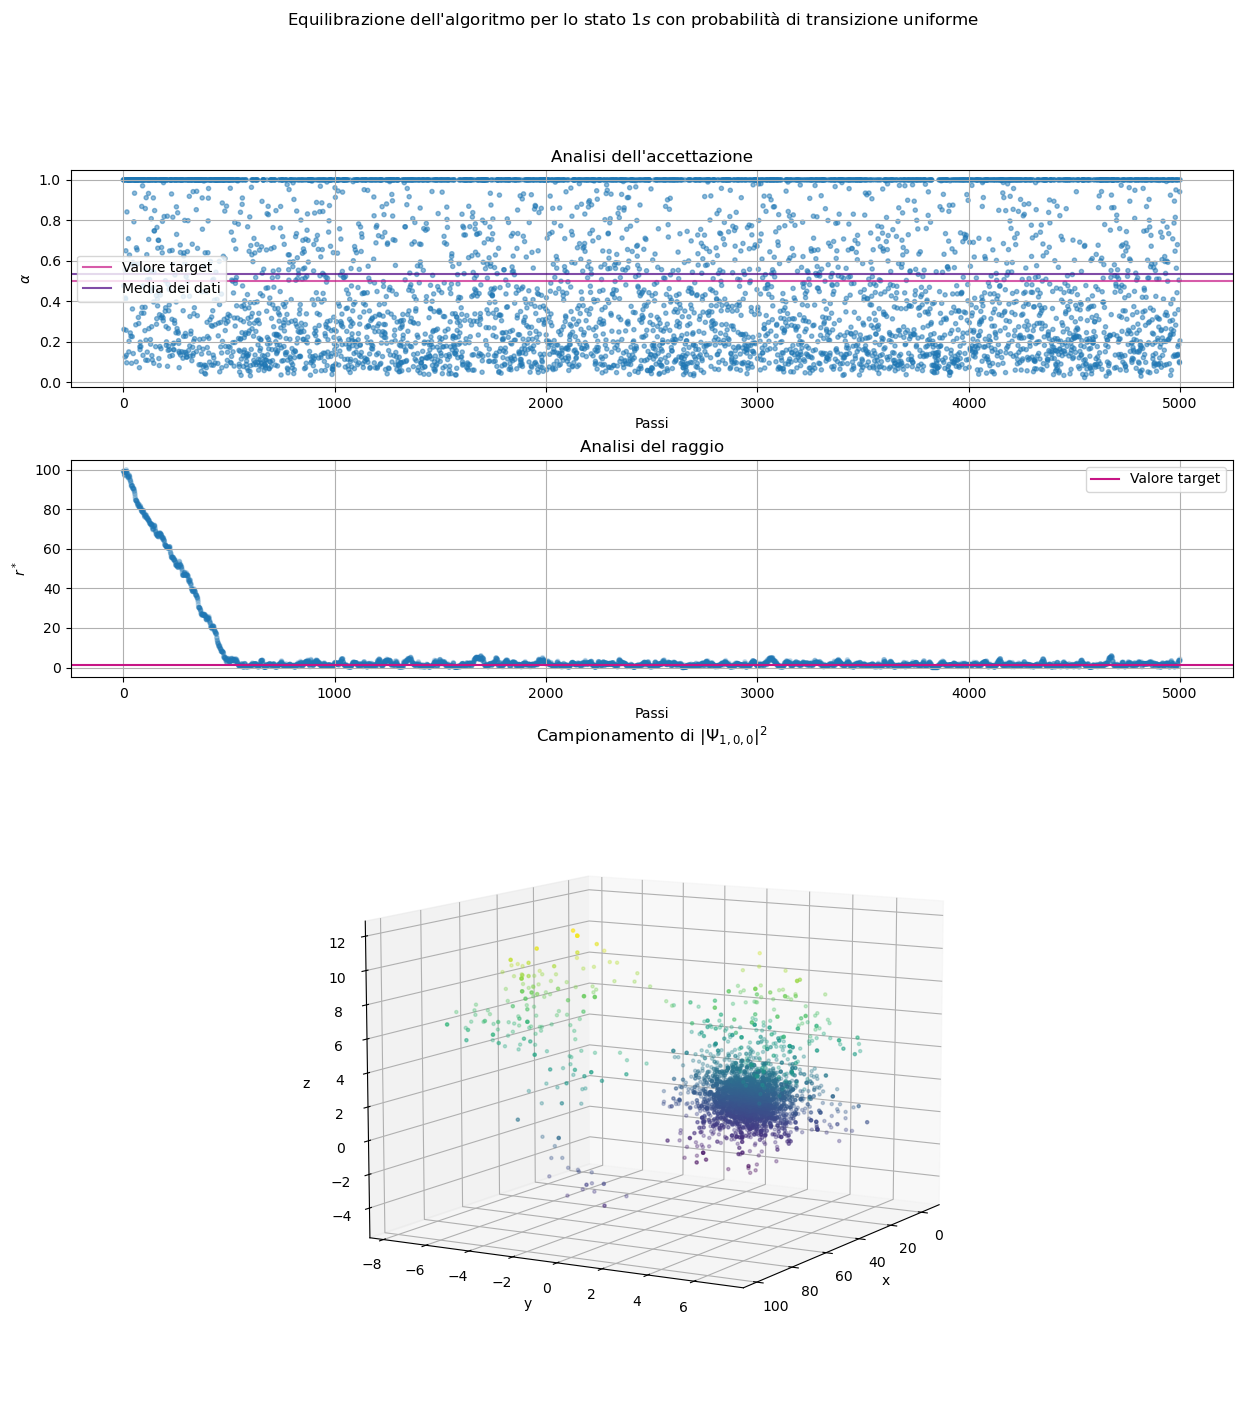

In [2]:
A=5000  #numero passi
xe=np.arange(A)+1

#valore di r e alpha per ogni step dell'equilibrazione
eu1, au1=np.loadtxt("unif1eq.dat", usecols=(0, 1),  unpack="true")  
#vettori per plot posizioni in 3d
exu1, eyu1, ezu1=np.loadtxt("unif1eqpos.dat", usecols=(0, 1, 2),  unpack="true")  

eu1fig ,(eu1plt1, eu1plt2, eu1plt3) = plt.subplots(3, 1, figsize=(15, 16), gridspec_kw={'height_ratios': [1, 1, 3]})

eu1plt1.scatter(xe, au1, marker='.', linestyle='', alpha=0.5)
eu1plt1.axhline(y=0.5, color="mediumvioletred", label="Valore target", linewidth=1.5, alpha=0.7)
eu1plt1.axhline(y=np.mean(au1), color="indigo", label="Media dei dati", linewidth=1.5, alpha=0.7)
eu1plt1.set_xlabel("Passi")
eu1plt1.set_ylabel(r"$\alpha$")
eu1plt1.set_title("Analisi dell'accettazione")
eu1plt1.grid(True)
eu1plt1.legend()

eu1plt2.scatter(xe, eu1, marker='.', linestyle='', alpha=0.2)
eu1plt2.axhline(y=3/2, color="mediumvioletred", label="Valore target", linewidth=1.5)
eu1plt2.set_xlabel("Passi")
eu1plt2.set_ylabel(r"$r^*$")
eu1plt2.set_title("Analisi del raggio")
eu1plt2.grid(True)
eu1plt2.legend()

eu1plt3.axis('off')
eu1plt3=eu1fig.add_subplot(313, projection='3d')
eu1plt3.scatter(exu1, eyu1, ezu1, marker='.', c=ezu1, alpha=0.3)
eu1plt3.set_xlabel('x')
eu1plt3.set_ylabel('y')
eu1plt3.set_zlabel('z')
eu1plt3.set_title(r"Campionamento di $\vert \Psi_{1,0,0} \vert ^2$")
eu1plt3.view_init(10, 30)

eu1fig.suptitle(r"Equilibrazione dell'algoritmo per lo stato $1s$ con probabilità di transizione uniforme")

plt.show()

Considerata ben riuscita l'equilibrazione, sono passata ad effettuare una simulazione con $M=10^6$ passi divisi in $N=100$ blocchi durante la quale ho effettuato l'analisi relativa a $\langle r^* \rangle$ e il suo errore. Il risultato all'ultimo blocco è compatibile con il valore analitico entro $2\sigma$ e, nuovamente, la distribuzione di compatibilità campionata assume la forma attesa nello spazio cartesiano.

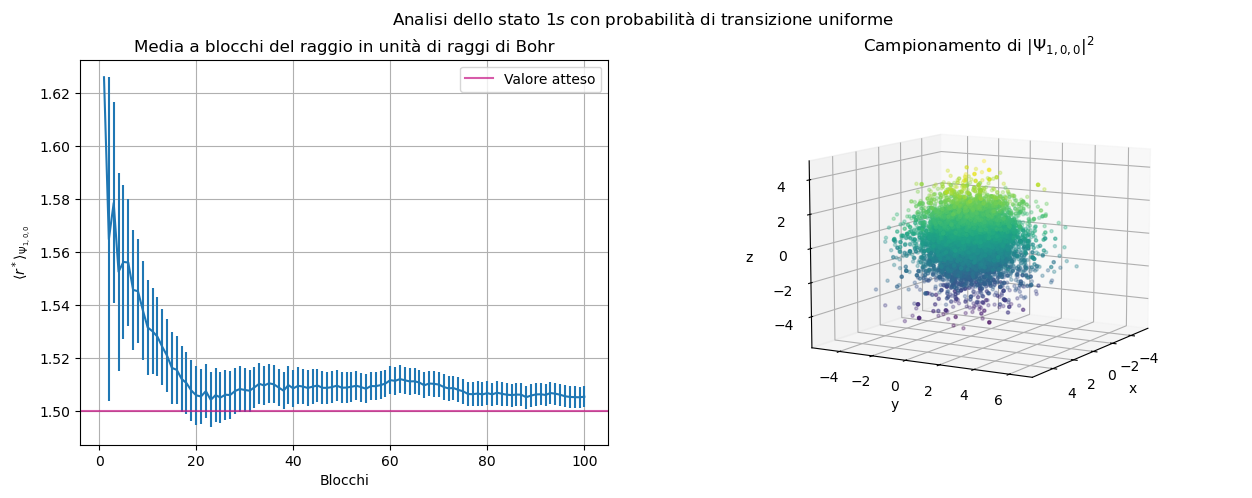

In [12]:
M=1000000/50  #frazione del numero di step totali per cui ho registrato la posizione
N=100  #numero blocchi
xb=np.arange(N)+1  #ascisse per plot raggio medio

#array per plot valor medio di r con errori
ru1, erroru1=np.loadtxt("unif1rad.dat", usecols=(0, 1),  unpack="true")  
 #array per plot posizioni campionate in 3d
xu1, yu1, zu1=np.loadtxt("unif1pos.dat", usecols=(0, 1, 2),  unpack="true") 

u1fig ,(u1plt1, u1plt2) = plt.subplots(1, 2, figsize=(15, 5))

u1plt1.errorbar(xb, ru1, yerr=erroru1)
u1plt1.axhline(y=3/2, color="mediumvioletred", label="Valore atteso", alpha=0.7)
u1plt1.set_xlabel("Blocchi")
u1plt1.set_ylabel(r"$\langle r^* \rangle_{\Psi_{1,0,0}}$")
u1plt1.set_title("Media a blocchi del raggio in unità di raggi di Bohr")
u1plt1.legend()
u1plt1.grid(True)

u1plt2.axis('off')
u1plt2=u1fig.add_subplot(122, projection='3d')
u1plt2.scatter(xu1, yu1, zu1, marker='.', c=zu1, alpha=0.3)
u1plt2.set_xlabel('x')
u1plt2.set_ylabel('y')
u1plt2.set_zlabel('z')
u1plt2.set_title(r"Campionamento di $\vert \Psi_{1,0,0} \vert ^2$")
u1plt2.view_init(10, 30)

u1fig.suptitle(r"Analisi dello stato $1s$ con probabilità di transizione uniforme")

plt.show()

### Stato $2p$

In questo caso una ragionevole scelta del passo del Metropolis, compatibilmente con i criteri già esposti, è risultata essere $\delta=3$. Sia l'andamento del valore di $r^*$ a ogni passo rispetto alla soluzione analitica che la forma del campionamento ottenuto, da confrontarsi con quella nota per $\vert \Psi_{2,1,0} \vert ^2$, testimoniano la buona riuscita dell'equilibrazione.

L'analisi svolta in seguito, con la modalità a blocchi già illustrata, ha dato luogo a risultati in buon accordo con la teoria. In particolare, $\langle r^* \rangle$ all'ultimo blocco è compatibile con il valore analitico entro $1\sigma$.

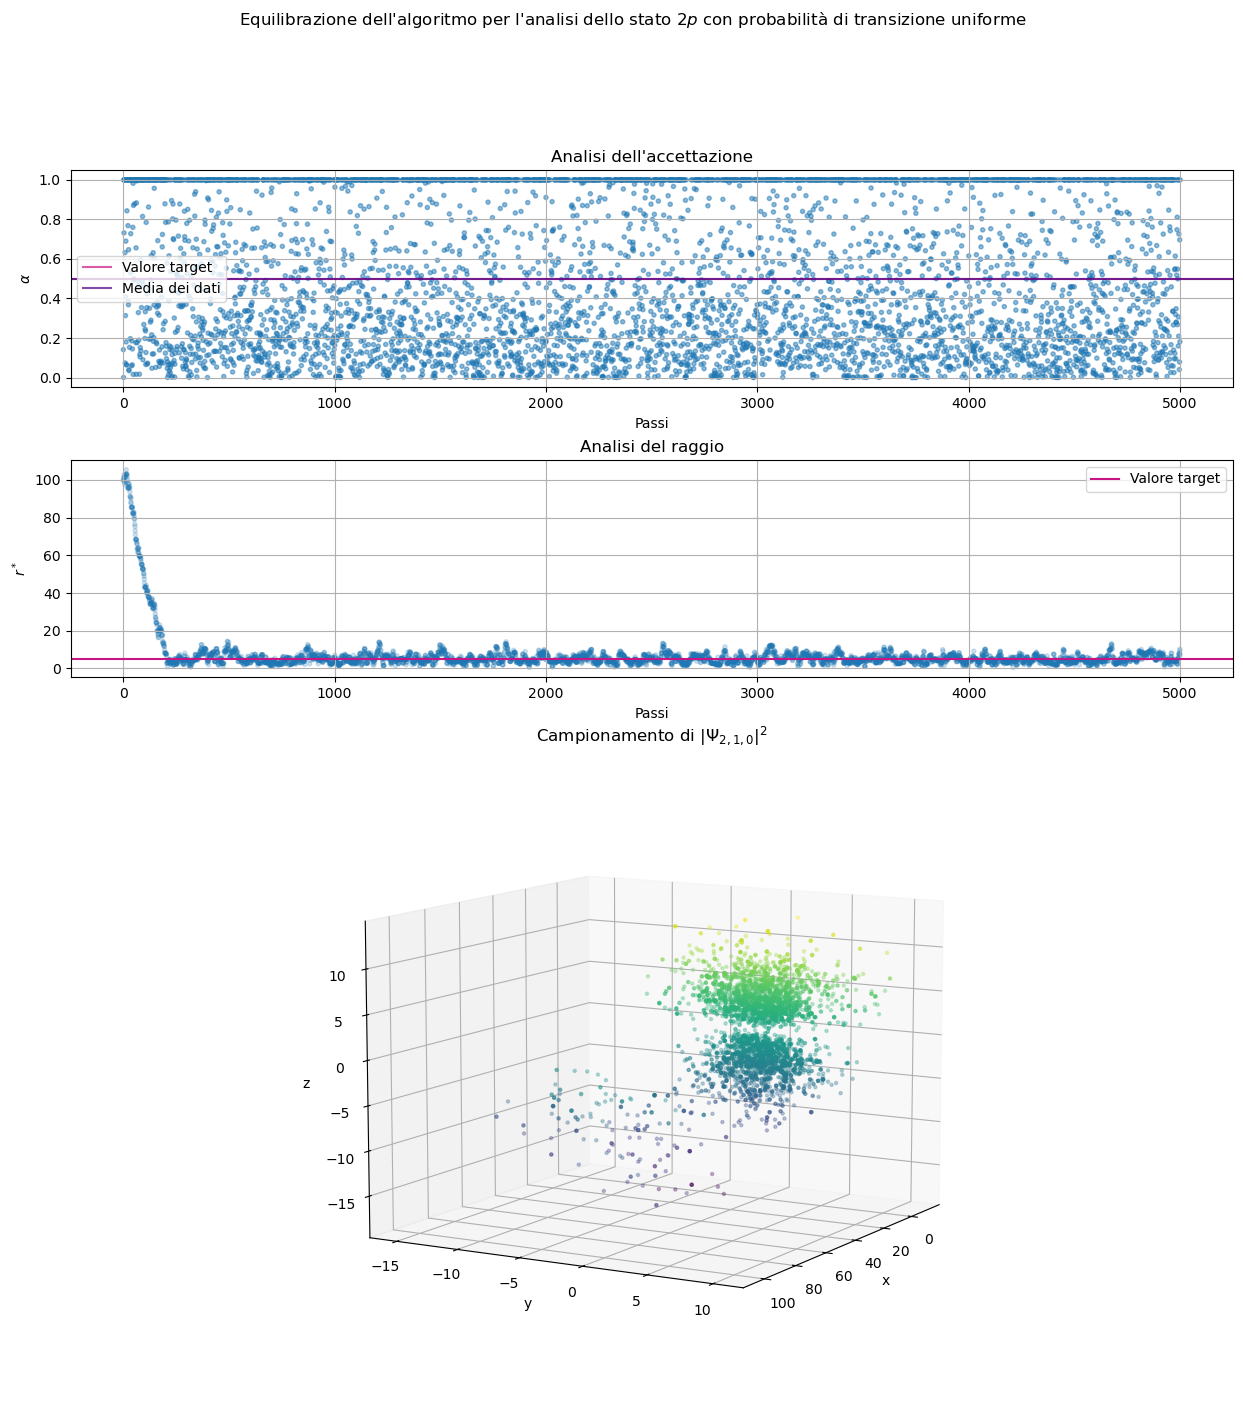

In [4]:
#valore di r e alpha per ogni step dell'equilibrazione
eu2, au2=np.loadtxt("unif2eq.dat", usecols=(0, 1),  unpack="true")
 #array per plot posizioni campionate in 3d
exu2, eyu2, ezu2=np.loadtxt("unif2eqpos.dat", usecols=(0, 1, 2),  unpack="true") 

eu2fig ,(eu2plt1, eu2plt2, eu2plt3) = plt.subplots(3, 1, figsize=(15, 16), gridspec_kw={'height_ratios': [1, 1, 3]})

eu2plt1.scatter(xe, au2, marker='.', linestyle='', alpha=0.5)
eu2plt1.axhline(y=0.5, color="mediumvioletred", label="Valore target", linewidth=1.5, alpha=0.7)
eu2plt1.axhline(y=np.mean(au2), color="indigo", label="Media dei dati", linewidth=1.5, alpha=0.7)
eu2plt1.set_xlabel("Passi")
eu2plt1.set_ylabel(r"$\alpha$")
eu2plt1.set_title("Analisi dell'accettazione")
eu2plt1.grid(True)
eu2plt1.legend()

eu2plt2.scatter(xe, eu2, marker='.', linestyle='', alpha=0.2)
eu2plt2.axhline(y=5, color="mediumvioletred", label="Valore target", linewidth=1.5)
eu2plt2.set_xlabel("Passi")
eu2plt2.set_ylabel(r"$r^*$")
eu2plt2.set_title("Analisi del raggio")
eu2plt2.grid(True)
eu2plt2.legend()

eu2plt3.axis('off')
eu2plt3=eu2fig.add_subplot(313, projection='3d')
eu2plt3.scatter(exu2, eyu2, ezu2, marker='.', c=ezu2, alpha=0.3)
eu2plt3.set_xlabel('x')
eu2plt3.set_ylabel('y')
eu2plt3.set_zlabel('z')
eu2plt3.set_title(r"Campionamento di $\vert \Psi_{2,1,0} \vert ^2$")
eu2plt3.view_init(10, 30)

eu2fig.suptitle(r"Equilibrazione dell'algoritmo per l'analisi dello stato $2p$ con probabilità di transizione uniforme")

plt.show()

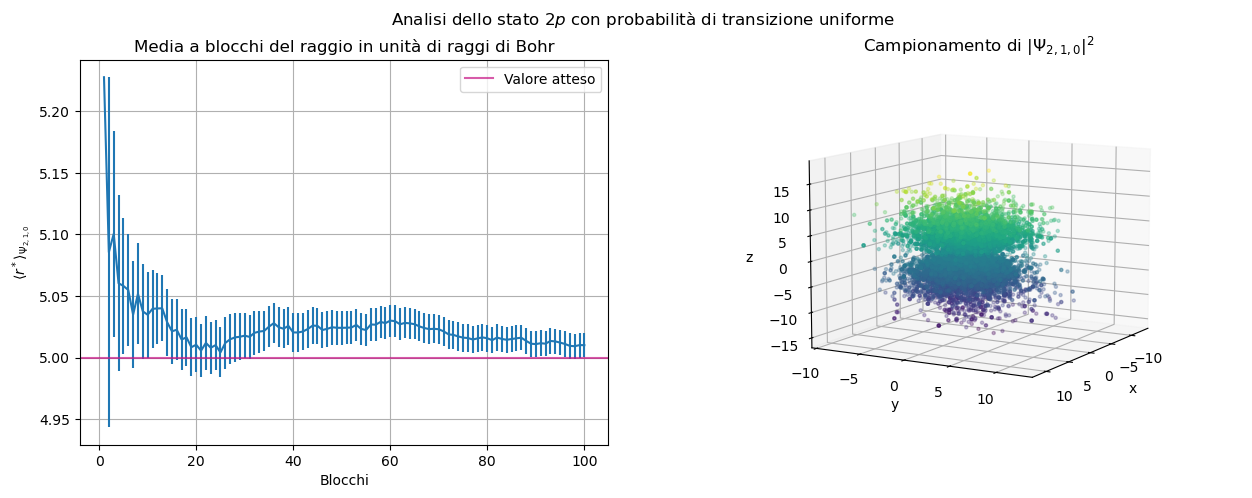

In [13]:
#array per plot valor medio di r con errori
ru2, erroru2=np.loadtxt("unif2rad.dat", usecols=(0, 1),  unpack="true")  
#array per plot posizioni campionate in 3d
xu2, yu2, zu2=np.loadtxt("unif2pos.dat", usecols=(0, 1, 2),  unpack="true")  

u2fig ,(u2plt1, u2plt2) = plt.subplots(1, 2, figsize=(15, 5))

u2plt1.errorbar(xb, ru2, yerr=erroru2)
u2plt1.axhline(y=5, color="mediumvioletred", label="Valore atteso", alpha=0.7)
u2plt1.set_xlabel("Blocchi")
u2plt1.set_ylabel(r"$\langle r^* \rangle_{\Psi_{2,1,0}}$")
u2plt1.set_title("Media a blocchi del raggio in unità di raggi di Bohr")
u2plt1.legend()
u2plt1.grid(True)

u2plt2.axis('off')
u2plt2=u2fig.add_subplot(122, projection='3d')
u2plt2.scatter(xu2, yu2, zu2, marker='.', c=zu2, alpha=0.3)
u2plt2.set_xlabel('x')
u2plt2.set_ylabel('y')
u2plt2.set_zlabel('z')
u2plt2.set_title(r"Campionamento di $\vert \Psi_{2,1,0} \vert ^2$")
u2plt2.view_init(10, 30)

u2fig.suptitle(r"Analisi dello stato $2p$ con probabilità di transizione uniforme")

plt.show()

## Campionamento con probabilità di transizione Gaussiana

In questa parte dell'esercitazione ho usato una probabilità di transizione tc la posizione al passo $n$ veniva estratta con una probabilità Gaussiana, centrata in $\vec x_{n-1}$ e con varianza $\delta^2$. Il valore di $\delta$ è stato fissato di volta in volta in base all'accettazione, come precedentemente illustrato.

### Stato $1s$

Fissata $\delta=0.7$, ho eseguito la fase di equilibrazione come nei casi precedenti e, attestata la convergenza dell'algoritmo, ho proceduto con l'analisi a blocchi analoga a quelle già esposte. I risultati all'ultimo blocco sono compatibili con la teoria entro $1\sigma$ e i punti campionati risultano in accordo con quanto atteso.

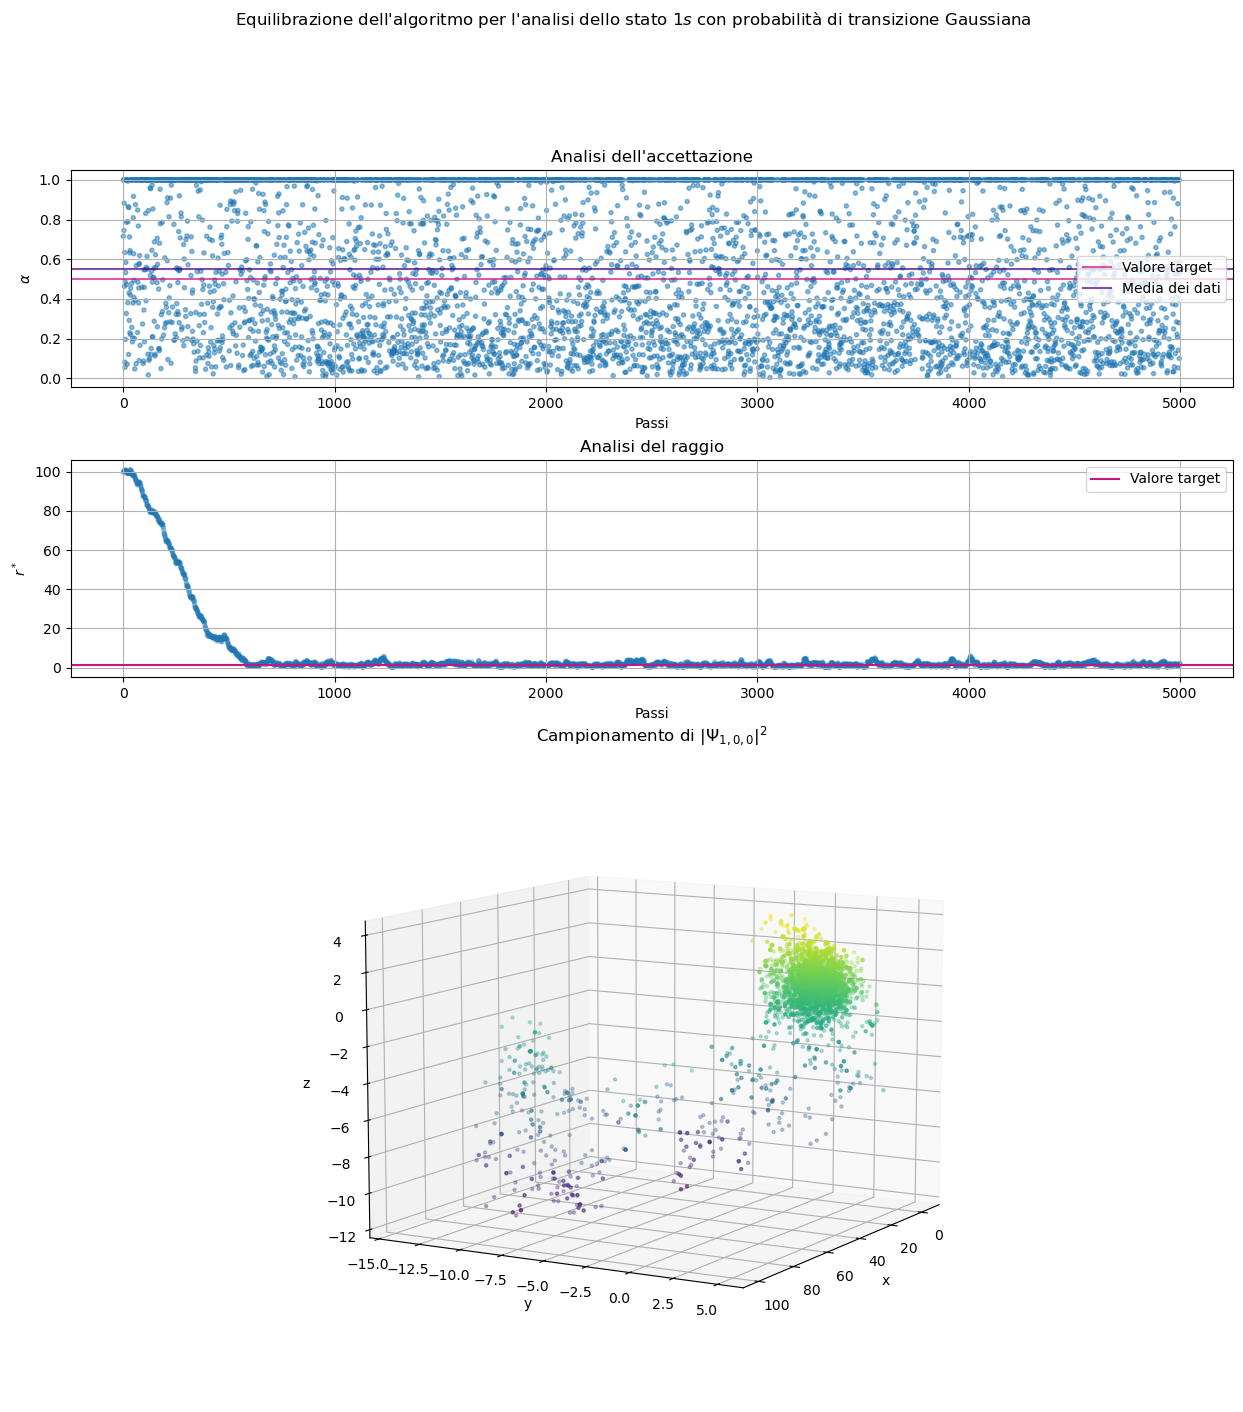

In [6]:
#valore di r e alpha per ogni step dell'equilibrazione
eg1, ag1=np.loadtxt("gaus1eq.dat", usecols=(0, 1),  unpack="true") 
#array per plot posizioni in 3d
exg1, eyg1, ezg1=np.loadtxt("gaus1eqpos.dat", usecols=(0, 1, 2),  unpack="true")  

eg1fig ,(eg1plt1, eg1plt2, eg1plt3) = plt.subplots(3, 1, figsize=(15, 16), gridspec_kw={'height_ratios': [1, 1, 3]})

eg1plt1.scatter(xe, ag1, marker='.', linestyle='', alpha=0.5)
eg1plt1.axhline(y=0.5, color="mediumvioletred", label="Valore target", linewidth=1.5, alpha=0.7)
eg1plt1.axhline(y=np.mean(ag1), color="indigo", label="Media dei dati", linewidth=1.5, alpha=0.7)
eg1plt1.set_xlabel("Passi")
eg1plt1.set_ylabel(r"$\alpha$")
eg1plt1.set_title("Analisi dell'accettazione")
eg1plt1.grid(True)
eg1plt1.legend()

eg1plt2.scatter(xe, eg1, marker='.', linestyle='', alpha=0.2)
eg1plt2.axhline(y=3/2, color="mediumvioletred", label="Valore target", linewidth=1.5)
eg1plt2.set_xlabel("Passi")
eg1plt2.set_ylabel(r"$r^*$")
eg1plt2.set_title("Analisi del raggio")
eg1plt2.grid(True)
eg1plt2.legend()

eg1plt3.axis('off')
eg1plt3=eg1fig.add_subplot(313, projection='3d')
eg1plt3.scatter(exg1, eyg1, ezg1, marker='.', c=ezg1, alpha=0.3)
eg1plt3.set_xlabel('x')
eg1plt3.set_ylabel('y')
eg1plt3.set_zlabel('z')
eg1plt3.set_title(r"Campionamento di $\vert \Psi_{1,0,0} \vert ^2$")
eg1plt3.view_init(10, 30)

eg1fig.suptitle(r"Equilibrazione dell'algoritmo per l'analisi dello stato $1s$ con probabilità di transizione Gaussiana")

plt.show()

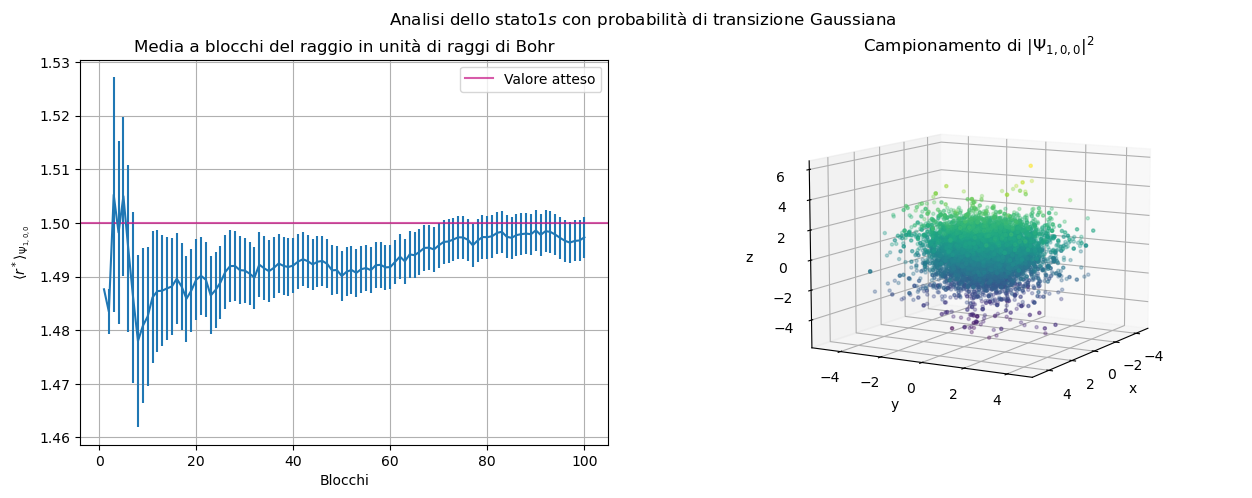

In [14]:
#array per plot valor medio di r con errori
rg1, errorg1=np.loadtxt("gaus1rad.dat", usecols=(0, 1),  unpack="true") 
#array per plot posizioni in 3d
xg1, yg1, zg1=np.loadtxt("gaus1pos.dat", usecols=(0, 1, 2),  unpack="true")  

g1fig ,(g1plt1, g1plt2) = plt.subplots(1, 2, figsize=(15, 5))

g1plt1.errorbar(xb, rg1, yerr=errorg1)
g1plt1.axhline(y=3/2, color="mediumvioletred", label="Valore atteso", alpha=0.7)
g1plt1.set_xlabel("Blocchi")
g1plt1.set_ylabel(r"$\langle r^* \rangle_{\Psi_{1,0,0}}$")
g1plt1.set_title("Media a blocchi del raggio in unità di raggi di Bohr")
g1plt1.grid(True)
g1plt1.legend()

g1plt2.axis('off')
g1plt2=g1fig.add_subplot(122, projection='3d')
g1plt2.scatter(xg1, yg1, zg1, marker='.', c=zg1, alpha=0.3)
g1plt2.set_xlabel('x')
g1plt2.set_ylabel('y')
g1plt2.set_zlabel('z')
g1plt2.set_title(r"Campionamento di $\vert \Psi_{1,0,0} \vert ^2$")
g1plt2.view_init(10, 30)

g1fig.suptitle(r"Analisi dello stato$1s$ con probabilità di transizione Gaussiana")

plt.show()

### Stato $2p$

Ho effettuato l'equilibrazione con $\delta=2$ e, visti i buoni risultati, ho proseguito con l'analisi a blocchi. All'ultimo blocco $\langle r^* \rangle$ risulta compatibile entro $2\sigma$ con la previsione analitica e anche la forma del campionamento ottenuto è in linea con la teoria.

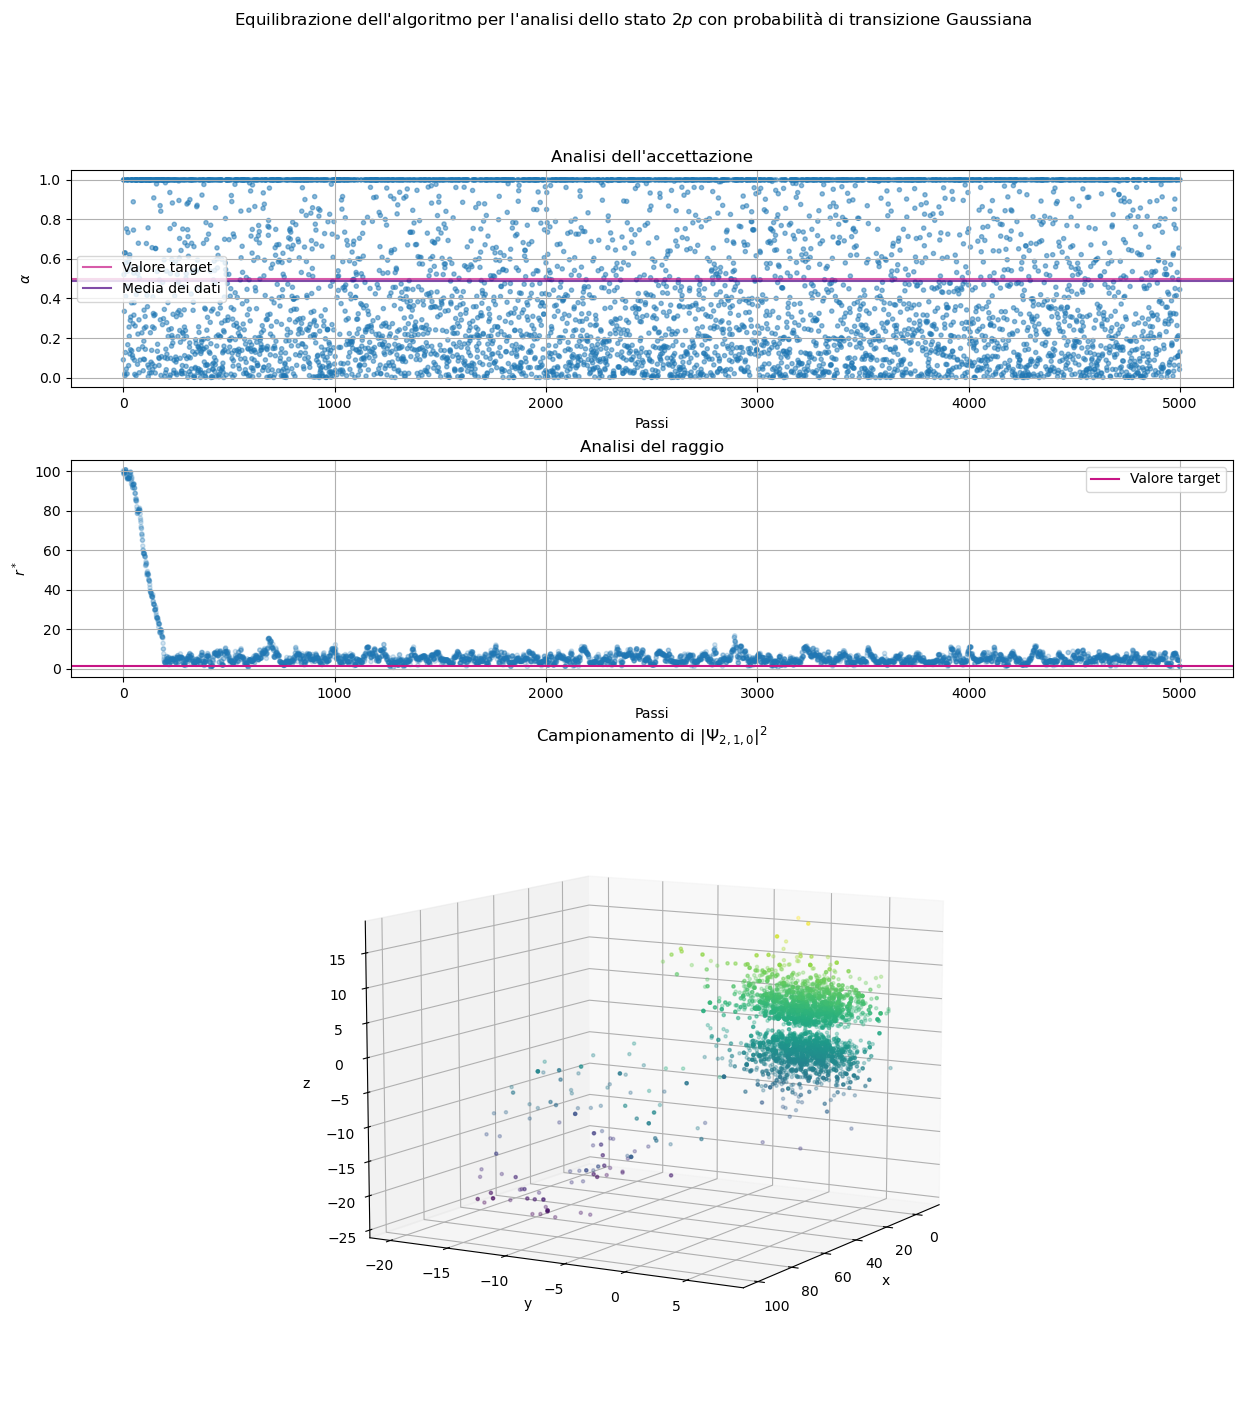

In [8]:
#valore di r e alpha per ogni step dell'equilibrazione
eg2, ag2=np.loadtxt("gaus2eq.dat", usecols=(0, 1),  unpack="true") 
#array per plot posizioni in 3d
exg2, eyg2, ezg2=np.loadtxt("gaus2eqpos.dat", usecols=(0, 1, 2),  unpack="true")  

eg2fig ,(eg2plt1, eg2plt2, eg2plt3) = plt.subplots(3, 1, figsize=(15, 16), gridspec_kw={'height_ratios': [1, 1, 3]})

eg2plt1.scatter(xe, ag2, marker='.', linestyle='', alpha=0.5)
eg2plt1.axhline(y=0.5, color="mediumvioletred", label="Valore target", linewidth=1.5, alpha=0.7)
eg2plt1.axhline(y=np.mean(ag2), color="indigo", label="Media dei dati", linewidth=1.5, alpha=0.7)
eg2plt1.set_xlabel("Passi")
eg2plt1.set_ylabel(r"$\alpha$")
eg2plt1.set_title("Analisi dell'accettazione")
eg2plt1.grid(True)
eg2plt1.legend()

eg2plt2.scatter(xe, eg2, marker='.', linestyle='', alpha=0.2)
eg2plt2.axhline(y=3/2, color="mediumvioletred", label="Valore target", linewidth=1.5)
eg2plt2.set_xlabel("Passi")
eg2plt2.set_ylabel(r"$r^*$")
eg2plt2.set_title("Analisi del raggio")
eg2plt2.grid(True)
eg2plt2.legend()

eg2plt3.axis('off')
eg2plt3=eg2fig.add_subplot(313, projection='3d')
eg2plt3.scatter(exg2, eyg2, ezg2, marker='.', c=ezg2, alpha=0.3)
eg2plt3.set_xlabel('x')
eg2plt3.set_ylabel('y')
eg2plt3.set_zlabel('z')
eg2plt3.set_title(r"Campionamento di $\vert \Psi_{2,1,0} \vert ^2$")
eg2plt3.view_init(10, 30)

eg2fig.suptitle(r"Equilibrazione dell'algoritmo per l'analisi dello stato $2p$ con probabilità di transizione Gaussiana")

plt.show()

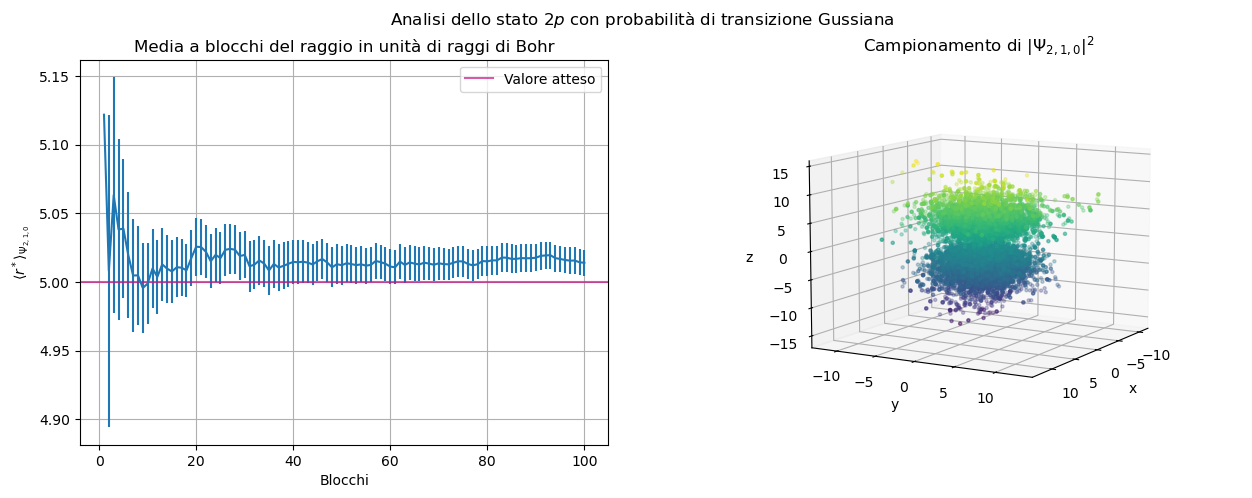

In [15]:
#array per plot valor medio di r e errore a blocchi
rg2, errorg2=np.loadtxt("gaus2rad.dat", usecols=(0, 1),  unpack="true")  
#array per plot posizioni in 3d
xg2, yg2, zg2=np.loadtxt("gaus2pos.dat", usecols=(0, 1, 2),  unpack="true") 

g2fig ,(g2plt1, g2plt2) = plt.subplots(1, 2, figsize=(15, 5))

g2plt1.errorbar(xb, rg2, yerr=errorg2)
g2plt1.axhline(y=5, color="mediumvioletred", label="Valore atteso", alpha=0.7)
g2plt1.set_xlabel("Blocchi")
g2plt1.set_ylabel(r"$\langle r^* \rangle_{\Psi_{2,1,0}}$")
g2plt1.set_title("Media a blocchi del raggio in unità di raggi di Bohr")
g2plt1.grid(True)
g2plt1.legend()

g2plt2.axis('off')
g2plt2=g2fig.add_subplot(122, projection='3d')
g2plt2.scatter(xg2, yg2, zg2, marker='.', c=zg2, alpha=0.3)
g2plt2.set_xlabel('x')
g2plt2.set_ylabel('y')
g2plt2.set_zlabel('z')
g2plt2.set_title(r"Campionamento di $\vert \Psi_{2,1,0} \vert ^2$")
g2plt2.view_init(10, 30)

g2fig.suptitle(r"Analisi dello stato $2p$ con probabilità di transizione Gussiana")

plt.show()

## Confronto

Confrontando per ogni stato i risultati ottenuti con le due $T(\vec{x}|\vec{y})$ utilizzate, è chiaro che entrambe siano adatte allo svolgimento dell'analisi effettuata. Guardando però l'andamento degli errori su $\langle r^* \rangle$ rispetto ai blocchi, mentre per lo stato $2p$ l'una e l'altra risultano quasi indistinguibili, nel caso dello stato $1s$ si nota che la probabilità di transizione Gaussiana ha prodotto valori più accurati. Ciò potrebbe essere dovuto al fatto che la probabilità campionata, $\vert \Psi_{1,0,0} \vert ^2$, è proporzionale ad una curva Gaussiana, cioè alla stessa $T(\vec{x}|\vec{y})$.

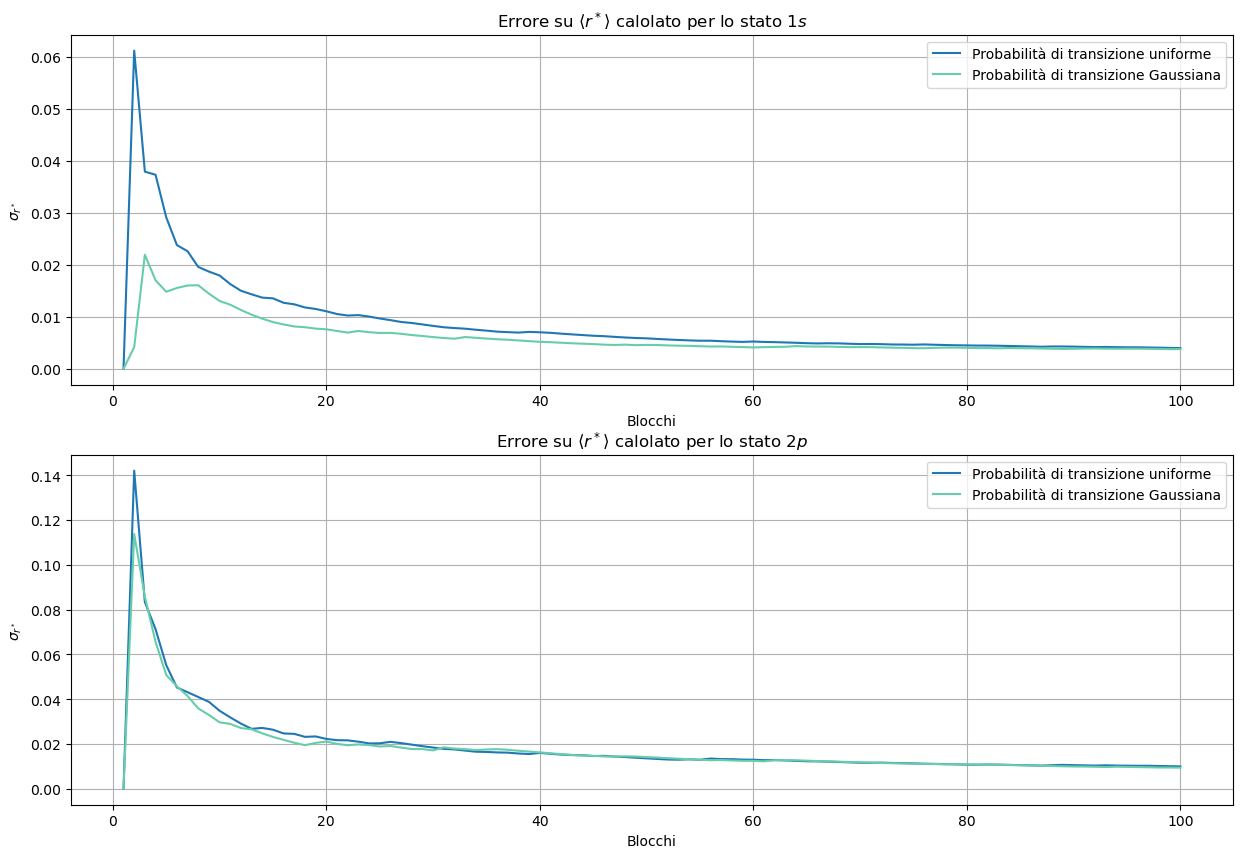

In [10]:
cfig ,(cplt1, cplt2) = plt.subplots(2, 1, figsize=(15, 10))

cplt1.plot(xb, erroru1, label="Probabilità di transizione uniforme")
cplt1.plot(xb, errorg1, label="Probabilità di transizione Gaussiana", color='mediumaquamarine')
cplt1.set_xlabel("Blocchi")
cplt1.set_ylabel(r"$\sigma_{r^*}$")
cplt1.set_title(r"Errore su $\left<r^*\right>$ calolato per lo stato $1s$")
cplt1.grid(True)
cplt1.legend()

cplt2.plot(xb, erroru2, label="Probabilità di transizione uniforme")
cplt2.plot(xb, errorg2, label="Probabilità di transizione Gaussiana", color='mediumaquamarine')
cplt2.set_xlabel("Blocchi")
cplt2.set_ylabel(r"$\sigma_{r^*}$")
cplt2.set_title(r"Errore su $\left<r^*\right>$ calolato per lo stato $2p$")
cplt2.grid(True)
cplt2.legend()

plt.show()